<a href="https://colab.research.google.com/github/corderobot/Kaggle_HousePrices/blob/master/NNs/HousePrices_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dataset
Dataset fue previamente procesado utilizando R. El dataset set limpio está subido a git en un archivo .csv llamado "clean.csv".
Dicho archivo es utilizado para entrenar/probar las redes neuronales

## Extracting

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/clean.csv')

## Getting to know the New Dataset

In [295]:
dataset.columns
#dataset.drop(dataset.columns[0])
dataset = dataset.drop(columns=['Unnamed: 0', 'Id'])
dataset = dataset[dataset.columns[0:10]]
dataset

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,X1stFlrSF,KitchenQual,BsmtQual
0,208500,0.666667,0.259231,0.50,0.5,0.386460,0.140098,0.119780,0.5,0.8
1,181500,0.555556,0.174830,0.50,1.0,0.324401,0.206547,0.212942,1.0,0.8
2,223500,0.666667,0.273549,0.50,0.5,0.428773,0.150573,0.134465,0.5,0.8
3,140000,0.666667,0.260550,0.75,1.0,0.452750,0.123732,0.143873,0.5,1.0
4,250000,0.777778,0.351168,0.75,0.5,0.589563,0.187398,0.186095,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...
1455,210000,0.555556,0.327619,0.50,1.0,0.352609,0.252373,0.399036,1.0,0.8
1456,266500,0.666667,0.377920,0.25,1.0,0.177715,0.188543,0.195961,0.5,1.0
1457,142125,0.444444,0.140166,0.25,1.0,0.169252,0.176432,0.170721,0.5,1.0
1458,147500,0.444444,0.173700,0.25,0.5,0.194640,0.205565,0.211565,1.0,1.0


## Correlation Heat Map

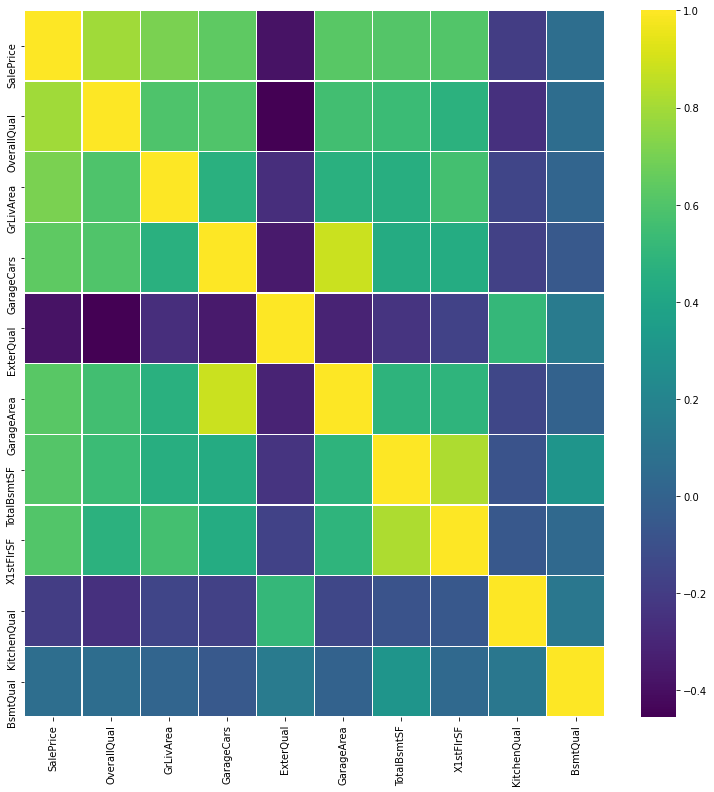

In [296]:
corr = dataset.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr, linewidths=.5, cmap='viridis')

## Partitioning
Se utilizará como criterio: 75% para entrenamiento y 25% para Test 

In [0]:
# Training
dataTrain = dataset.sample(frac = 0.75)
trainPredictions = dataTrain["SalePrice"]
dataTrain = dataTrain.drop(columns=['SalePrice'])

# Test
dataTest = dataset.drop(dataTrain.index)
testPredictions = dataTest["SalePrice"]
dataTest = dataTest.drop(columns=['SalePrice'])

# Modelo

## Macro Variables
Variables macro que son utilizados como parámetros en el entrenamiento

In [0]:
epochs = 100
split = 0.2

## Useful Functions

### Model Defintion

In [0]:
def buildModel(inputShape):
  model = Sequential([
      Dense(2048, activation='relu', input_shape=(inputShape,)),
      Dense(1024, activation='relu'),
      Dense(512, activation='relu'),
      Dense(128, activation='relu'),
      Dense(32, activation='relu'),
      Dense(4, activation='relu'),
      Dense(1)
  ])

  opt = RMSprop(0.001)

  model.compile(optimizer=opt,
              loss='mse',
              metrics=['mae', 'mse'])
  return model

### Fit Function

In [0]:
def train_model(model, data, predictions):
  print("Training")
  return model.fit(data,
                      predictions,
                      epochs=epochs,
                      #validation_data=validation_split,
                      validation_split=split
                    )

### Evaluation Function

In [0]:
def evaluate_model(model, data, predictions):
  print("\nEvaluation")
  return model.evaluate(data, predictions)

### Prediction Function

In [0]:
def predictions_model(model, data):
  return model.predict(data)

## Construcción del Modelo

In [303]:
len(dataTrain.columns)

9

In [304]:
model = buildModel(len(dataTrain.columns))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 2048)              20480     
_________________________________________________________________
dense_59 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_60 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_61 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_62 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_63 (Dense)             (None, 4)                 132       
_________________________________________________________________
dense_64 (Dense)             (None, 1)               

## Evaluación del Modelo

In [305]:
dataTrain

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,X1stFlrSF,KitchenQual,BsmtQual
212,0.666667,0.285983,0.50,1.0,0.454161,0.147300,0.137219,0.5,0.8
451,0.666667,0.225885,0.50,1.0,0.406206,0.250900,0.275126,0.5,0.8
441,0.333333,0.208365,0.00,1.0,0.000000,0.235679,0.253786,0.0,1.0
1389,0.666667,0.224378,0.50,0.5,0.381523,0.249591,0.273291,0.5,0.8
780,0.666667,0.173135,0.50,1.0,0.283498,0.202455,0.210877,1.0,0.8
...,...,...,...,...,...,...,...,...,...
752,0.555556,0.218538,0.50,1.0,0.406206,0.242062,0.266177,0.5,0.8
720,0.777778,0.265260,0.50,0.5,0.397743,0.285106,0.323084,0.5,0.8
94,0.555556,0.273549,0.50,1.0,0.482370,0.134861,0.131023,0.5,0.8
1010,0.444444,0.250565,0.00,1.0,0.000000,0.000000,0.305186,1.0,0.0


In [306]:
trainPredictions

212     252678
451     280000
441     118000
1389    235000
780     176000
         ...  
752     217000
720     275000
94      204750
1010    100000
873     133000
Name: SalePrice, Length: 1095, dtype: int64

In [307]:
# Training
train_model(model, dataTrain, trainPredictions)

# Evaluation
evaluation = evaluate_model(model, dataTest, testPredictions)
evaluation

Training
Epoch 1/100
28/28 [==============================] - 1s 45ms/step - loss: 30954379264.0000 - mae: 155517.7344 - mse: 31288223744.0000 - val_loss: 7052100096.0000 - val_mae: 55782.8086 - val_mse: 7138472960.0000
Epoch 2/100
28/28 [==============================] - 1s 41ms/step - loss: 5090110464.0000 - mae: 52981.2539 - mse: 5112576000.0000 - val_loss: 4672408576.0000 - val_mae: 52860.4531 - val_mse: 4717682176.0000
Epoch 3/100
28/28 [==============================] - 1s 41ms/step - loss: 4371330048.0000 - mae: 49086.0312 - mse: 4316138496.0000 - val_loss: 3712737280.0000 - val_mae: 42839.7617 - val_mse: 3758910464.0000
Epoch 4/100
28/28 [==============================] - 1s 41ms/step - loss: 3686070016.0000 - mae: 43283.6602 - mse: 3620349184.0000 - val_loss: 2984300288.0000 - val_mae: 38429.4219 - val_mse: 3020199424.0000
Epoch 5/100
28/28 [==============================] - 1s 40ms/step - loss: 2854477056.0000 - mae: 36666.6680 - mse: 2891692288.0000 - val_loss: 2383935744.00

[1166708352.0, 22643.62890625, 1141260928.0]

## Predicciones del Modelo